<a href="https://colab.research.google.com/github/mohamedssafini/deepLearning/blob/main/deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U d2l

     |████████████████████████████████| 81kB 2.2MB/s 


In [3]:
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l
import random

In [4]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

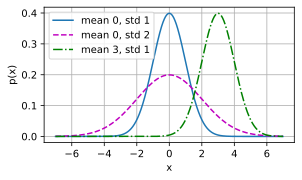

In [5]:
# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [6]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([-1.8307818  1.495013 ], shape=(2,), dtype=float32) 
label: tf.Tensor([-4.559376], shape=(1,), dtype=float32)


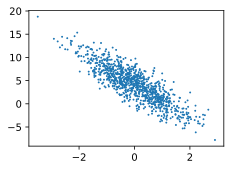

In [8]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [11]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 0.19147544 -0.15892722]
 [ 0.9748705  -0.2955866 ]
 [-0.8261629  -0.354877  ]
 [-0.55015415  0.7998414 ]
 [ 1.5218745   1.9162204 ]
 [-0.89436936  0.94463634]
 [ 0.19182296  1.5325775 ]
 [ 0.02719303 -0.82359755]
 [-0.3465871   0.9676354 ]
 [ 1.4210956  -1.0848274 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 5.125061  ]
 [ 7.1775    ]
 [ 3.7515576 ]
 [ 0.37289298]
 [ 0.72681713]
 [-0.8054275 ]
 [-0.6369732 ]
 [ 7.027195  ]
 [ 0.22042035]
 [10.734516  ]], shape=(10, 1), dtype=float32)


In [12]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [13]:
print(w)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.01833341],
       [-0.00879037]], dtype=float32)>


In [14]:
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [15]:
def linreg(X, w, b):
    """The linear regression model."""
    return tf.matmul(X, w) + b

In [16]:
def squared_loss(y_hat, y): 
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape))**2 / 2

In [17]:
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

In [18]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.042561
epoch 2, loss 0.000162
epoch 3, loss 0.000047


In [19]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00013661 -0.00041437]
error in estimating b: [0.00035763]


In [21]:
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [22]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a TensorFlow data iterator."""
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [23]:
next(iter(data_iter))

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[-1.7648619e-01,  4.5436209e-01],
        [ 7.6665467e-01,  4.8744476e-01],
        [ 5.4059502e-02, -3.5937794e-02],
        [-1.9707883e-02, -2.5103483e+00],
        [ 6.2021124e-01, -6.8848741e-01],
        [-1.2511438e+00, -7.3216468e-01],
        [-8.7329862e-04, -5.3602809e-01],
        [-2.6711631e-01, -3.2634902e-01],
        [ 4.0789771e-01, -5.6015664e-01],
        [-2.6617488e-01, -6.7221683e-01]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 2.2991576],
        [ 4.0828567],
        [ 4.431713 ],
        [12.68191  ],
        [ 7.778519 ],
        [ 4.1775246],
        [ 6.0310464],
        [ 4.7839212],
        [ 6.9131474],
        [ 5.9365954]], dtype=float32)>)

In [24]:
# `keras` is the high-level API for TensorFlow
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))

In [26]:
initializer = tf.initializers.RandomNormal(stddev=0.01)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

In [27]:
loss = tf.keras.losses.MeanSquaredError()

In [28]:
trainer = tf.keras.optimizers.SGD(learning_rate=0.03)

In [29]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            l = loss(net(X, training=True), y)
        grads = tape.gradient(l, net.trainable_variables)
        trainer.apply_gradients(zip(grads, net.trainable_variables))
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000220
epoch 2, loss 0.000097
epoch 3, loss 0.000097


In [30]:
w = net.get_weights()[0]
print('error in estimating w', true_w - tf.reshape(w, true_w.shape))
b = net.get_weights()[1]
print('error in estimating b', true_b - b)

error in estimating w tf.Tensor([0.00079393 0.00054312], shape=(2,), dtype=float32)
error in estimating b [0.0002141]
